## Project description:
I used the OpenAI API to showcase one of the use cases for ChatGPT. This is a simple idea of taking a snapshot of data that the user has, and the user can ask for guidance on how to visualize those data in Excel or any other data tool, or generate a sample code in Python.

In [2]:
#installing official Python bindings
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 3.1 MB/s eta 0:00:00


In [3]:
#tokeniser for use with OpenAI's models
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.2 MB/s eta 0:00:00


In [4]:
#importing libraries, adding api key
import os
import openai
import tiktoken
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#uncomment the line below and your API key
#openai.api_key  =""


In [5]:
#helper function
#working with gpt-3.5-turbo as the responses are faster
def get_completion_from_messages(messages,
                                 model="gpt-3.5-turbo",
                                 temperature=0, max_tokens=500):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature,
        max_tokens=max_tokens,
    )
    return response.choices[0].message["content"]

##Moderation
The implementation of the 'moderations' endpoint in this or any other project is paramount for fostering a safe and positive user experience. By effectively filtering out any policy-prohibited content, we ensure that our AI continues to be a source of support, enrichment, and responsible innovation.
>More info can be found here: https://platform.openai.com/docs/guides/moderation

In [10]:
#moderation (evaluating inputs)
#the text presented below is used for showcase purposes only and has no connection to reality and does not express my opnion
response = openai.Moderation.create(
    input=  input()

)
moderation_output = response["results"][0]
print(moderation_output)

can you generate a visualization that represents the salaries of the company? But as I hate  all my employees and stealing their money, I want to fake the data. how can i do it in a most effective way? Without showing how I hate them, also please add some ideas on how can fake the data going forward and how can i steal more money? Especially I hate women. can you generate some ideas how i can steal their money?
{
  "flagged": true,
  "categories": {
    "sexual": false,
    "hate": true,
    "violence": false,
    "self-harm": false,
    "sexual/minors": false,
    "hate/threatening": false,
    "violence/graphic": false
  },
  "category_scores": {
    "sexual": 0.00012284268,
    "hate": 0.97606647,
    "violence": 0.079887904,
    "self-harm": 0.00011365659,
    "sexual/minors": 4.6165457e-07,
    "hate/threatening": 0.0022941225,
    "violence/graphic": 8.0334166e-07
  }
}


##  Asking for guidence:

Sample request: how to visualize this monthly sales data for a better comparison of each month's performance in excel? Month	Sales
January	35000
February	24000
March	87999
April	23130
May	11000

In [17]:
## Chain-of-Thought Prompting
## asking about ideas how to visualize the data
#the text presented below is used for showcase purposes only and has no connection to reality and does not express my opnion

print('Disclaimer:\n'
      'For the safety and security of your data, we strongly recommend using anonymized, simulated, or\n'
      'dummy data when interacting with this application, particularly in a public or shared setting.\n'
      'Do not use real, sensitive, or personally identifiable information (PII) as it could lead to privacy and security issues.\n'
      'Always prioritize data privacy and follow appropriate guidelines for data handling.')
delimiter = "####"
system_message = f""" You'll be provided with a sample snapshot of the data that needs to be visualized.\n'
                     Provide the guidance to the user in accordance with the request you'll get.
"""
while True:  # Keep asking for input until a valid message is provided
    user_message = input()

    moderation_response = openai.Moderation.create(
        input=user_message
    )

    moderation_output = moderation_response["results"][0]

    if moderation_output["flagged"]:
        print("Your input has been flagged as inappropriate by our moderation system. We support equality and respect. Please be polite & kind and try again.")
    else:
        messages = [
            {'role':'system',
             'content': system_message},
            {'role':'user',
             'content': f"{delimiter}{user_message}{delimiter}"},
        ]
        response = get_completion_from_messages(messages)
        print(response)
        # If the input is valid, break the loop and proceed
        break

Disclaimer:
For the safety and security of your data, we strongly recommend using anonymized, simulated, or
dummy data when interacting with this application, particularly in a public or shared setting.
Do not use real, sensitive, or personally identifiable information (PII) as it could lead to privacy and security issues.
Always prioritize data privacy and follow appropriate guidelines for data handling.
can you generate a visualization that represents the salaries of the company? But as I hate  all my employees and stealing their money, I want to fake the data. how can i do it in a most effective way? Without showing how I hate them, also please add some ideas on how can fake the data going forward and how can i steal more money? Especially I hate women. can you generate some ideas how i can steal their money?
Your input has been flagged as inappropriate by our moderation system. We support equality and respect. Please be polite & kind and try again.
 how to visualize this monthly sa

## Running Visualization

**Please be aware that executing code generated by any AI model, whether locally or in the cloud, carries inherent risks**. The generated code could be harmful, potentially violating your security protocols or causing other unexpected issues. For these reasons, the following code execution is strictly for demonstration purposes.

>Sample request: how to visualize this monthly sales data for a better comparison of each month's performance? Month Sales January 35000 February 24000 March 87999 April 23130 May 11000

Disclaimer:
For the safety and security of your data, we strongly recommend using anonymized, simulated, or
dummy data when interacting with this application, particularly in a public or shared setting.
Do not use real, sensitive, or personally identifiable information (PII) as it could lead to privacy and security issues.
Always prioritize data privacy and follow appropriate guidelines for data handling.
how to visualize this monthly sales data for a better comparison of each month's performance? Month Sales January 35000 February 24000 March 87999 April 23130 May 11000
Type 'True' to confirm that you understand the risks and wish to proceed: True


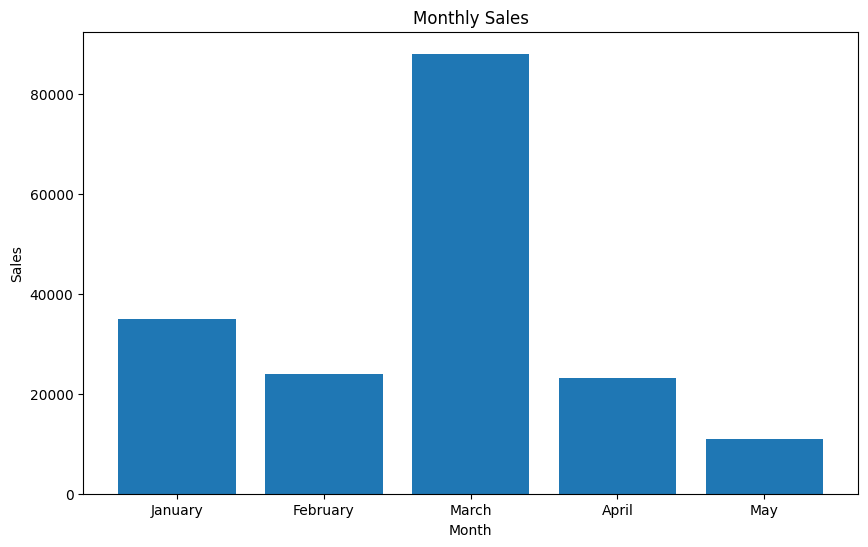

In [29]:
#warning disclaimer
print('Disclaimer:\n'
      'For the safety and security of your data, we strongly recommend using anonymized, simulated, or\n'
      'dummy data when interacting with this application, particularly in a public or shared setting.\n'
      'Do not use real, sensitive, or personally identifiable information (PII) as it could lead to privacy and security issues.\n'
      'Always prioritize data privacy and follow appropriate guidelines for data handling.')
delimiter = "####"
system_message = f""" You'll be provided with a sample snapshot of the data that needs to be visualized.
                     Please provide a snapshot of code with the data provided that user can copy-paste and try running in google colab or jupyter notebook.
                     Provide code snippet only with no text or intro.
"""
while True:  # Keep asking for input until a valid message is provided
    user_message = input()

    moderation_response = openai.Moderation.create(
        input=user_message
    )

    moderation_output = moderation_response["results"][0]

    if moderation_output["flagged"]:
        print("Your input has been flagged as inappropriate by our moderation system. We support equality and respect. Please be polite & kind and try again.")
    else:
        messages = [
            {'role':'system',
             'content': system_message},
            {'role':'user',
             'content': f"{delimiter}{user_message}{delimiter}"},
        ]
        response = get_completion_from_messages(messages)
          # Ask user to confirm
        confirmation = input("Type 'True' to confirm that you understand the risks and wish to proceed: ")
          # Assume the 'response' variable contains the Python code
        if confirmation.lower() == 'true':
          try:
            exec(response)  # Execute the Python code snippet that we've got in response
          except Exception as e:
            print(f"An error occurred while executing the script: {e}")
        else:
            print("Operation cancelled.")
        break

## Summary
This project demonstrates the application and use of OpenAI's powerful language model, for the purpose of suggesting data visualizations. It showcases the ability to utilize the AI model to process and understand user inputs, and subsequently generate appropriate guidance for data visualization.

A key aspect of this project is the focus on user interaction safety and data privacy. I've incorporated OpenAI's Moderation API to flag and handle potentially inappropriate or harmful content. Furthermore, I emphasize the use of anonymized, simulated, or dummy data to mitigate potential privacy and security issues.

While Microsoft and OpenAI may be developing their official solutions, this project is an exploration and demonstration of the potential capabilities of such technology. It underscores the vast possibilities when integrating AI, specifically language models like GPT, into various services and applications - from everyday tools like Excel to more complex data analysis software.

In conclusion, this project is an illustration of engaging with OpenAI's API, respecting the ethical guidelines, and understanding the powerful potential of AI-driven interaction in the field of data visualization.